In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql

In [2]:
#<img src = "chinook Tables.png" width = "40%" />

<img src = "chinook Tables.png" width="70%"/>

In [3]:
conn = sql.connect("chinook.db")

In [4]:
q = "select * from sqlite_master"

pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [5]:
q = "select * from album "
pd.read_sql_query(q, conn)   # accessing album only

,album_id,title,artist_id
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [6]:
def read_sql(q):
    return pd.read_sql_query(q, conn)

In [7]:
q = ''' select album_id albumID, sum(track_id) trackID from track 
        group by 1
                
        '''
read_sql(q)

# work done by me

,albumID,trackID
0,1,91
1,2,2
2,3,12
3,4,148
4,5,450
...,...,...
342,343,3499
343,344,3500
344,345,3501
345,346,3502


In [8]:
q = '''pragma table_info(invoice) '''

read_sql(q)

,cid,name,type,notnull,dflt_value,pk
0,0,invoice_id,INTEGER,1,None,1
1,1,customer_id,INTEGER,1,None,0
2,2,invoice_date,DATETIME,1,None,0
3,3,billing_address,NVARCHAR(70),0,None,0
4,4,billing_city,NVARCHAR(40),0,None,0
5,5,billing_state,NVARCHAR(40),0,None,0
6,6,billing_country,NVARCHAR(40),0,None,0
7,7,billing_postal_code,NVARCHAR(10),0,None,0
8,8,total,"NUMERIC(10,2)",1,None,0
9,9,tax,numeric,0,None,0


In [9]:
q = ''' with abc as (select il.invoice_id, il.track_id, t.album_id

        from invoice_line il
        
        left join track t
        
        on 
        
        il.track_id = t.track_id
        
        )
        
        select * from abc
        
        '''

df = read_sql(q)

##########my work

In [10]:
# check the null value in album_id against the track_id. no album_id means its a track. 

In [11]:
q = """select invoice_id, track_id               
       From invoice_line
       group by 1"""

read_sql(q)                                      #### by sir

,invoice_id,track_id
0,1,1158
1,2,3476
2,3,2516
3,4,3448
4,5,1986
...,...,...
609,610,1053
610,611,2663
611,612,2204
612,613,1865


In [12]:
q = """with 

       first_track  as (select invoice_id, track_id
       From invoice_line
       group by 1),
       
       album_p as (
       
       select ft.*, case   
       when 
    (
       select t.track_id from track t
       where t.album_id = (select t2.album_id from track t2
       where t2.track_id = ft.track_id)
       
       Except
       
       select il2.track_id from invoice_line il2
       where il2.invoice_id = ft.invoice_id
       ) is Null
       
       and 
       
       (
        select il2.track_id from invoice_line il2
       where il2.invoice_id = ft.invoice_id
       
       Except
       
      select t.track_id from track t
       where t.album_id = (select t2.album_id from track t2
       where t2.track_id = ft.track_id)
       ) 
       is Null
       then "Yes"
       else "NO"
       end as Album_purchased
       from first_track ft
       )
       
       select Album_purchased, count(invoice_id) number_of_invoces from album_p
       group by 1
         
       """

read_sql(q)

# ft is a first track making it a variable. ##condition always starts with case in sql


,Album_purchased,number_of_invoces
0,NO,500
1,Yes,114


In [13]:
q = """select t2.album_id from track t2
       where t2.track_id = 0 """

read_sql(q)

,album_id


In [14]:
q = """select invoice_id, track_id
       From invoice_line
       group by invoice_id
       having invoice_id in (1,2)
       
       intersect
       
       select invoice_id, track_id
       From invoice_line
       group by invoice_id
       having invoice_id = 3
    
       """

read_sql(q)

,invoice_id,track_id


In [27]:
# (1158
# Except
# 1158)

# is Null

# and

# (1158
# Except
# 1158)

# is Null

# Yes


In [28]:
# (Null
# Except
# 3476)

# is Null

# and

# (3476
# Except
# Null)

# is Null

# No

In [29]:
# country, total_cst, tot_sales, avg_order, life_time_value


In [ ]:
# MULTIPLE VARIABLES 

In [18]:
q = """with

      c_d as (Select c.country, count(distinct(i.customer_id)) total_cst,
      sum(i.total) tot_sales, sum(i.total)/count(i.customer_id) avg_order,
      sum(total)/count(distinct(i.customer_id)) life_time_value
      from customer c
      left join invoice i
      on i.customer_id = c.customer_id
      group by 1),
      
     updated as ( select case
      when total_cst =1 then "others"
      else country
      end as country, total_cst,
      tot_sales,avg_order,life_time_value
      from c_d),
      
      final as (select country, sum(total_cst) total_cst,
      sum(tot_sales) tot_sales, 
      sum(avg_order)/count(avg_order) as avg_order,
      sum(life_time_value)/count(life_time_value) life_time_value
      from updated
      group by 1),
      
      latest  as (select *, case 
      when country = "others"
      then 0
      else 1
      end as ord
      from final
      order by 6 desc, tot_sales Desc)
      
      select country,total_cst,tot_sales,avg_order,life_time_value
      from latest
      """

read_sql(q)

,country,total_cst,tot_sales,avg_order,life_time_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,others,15,1094.94,7.445071,72.996000


In [19]:
df = read_sql(q)

In [20]:
df.head()

,country,total_cst,tot_sales,avg_order,life_time_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000


In [21]:
country = df.set_index("country")
country.index.name = None

In [22]:
country.head()

,total_cst,tot_sales,avg_order,life_time_value
USA,13,1040.49,7.942672,80.037692
Canada,8,535.59,7.047237,66.948750
Brazil,5,427.68,7.011148,85.536000
France,5,389.07,7.781400,77.814000
Germany,4,334.62,8.161463,83.655000


In [23]:
import matplotlib.pyplot as plt

In [24]:
# fig = plt.figure(figsize = (9,10))


## ax.flatten() make the the order of plot. no need to manual set like below


# ax1 = fig.add_subplot(2,2,1)
# ax2 = fig.add_subplot(2,2,4)
# ax1 = fig.add_subplot(2,2,3)
# ax1 = fig.add_subplot(2,2,2)

In [25]:
colors = [plt.cm.Accent(i) for i in np.linspace(0,1, country.shape[0])]

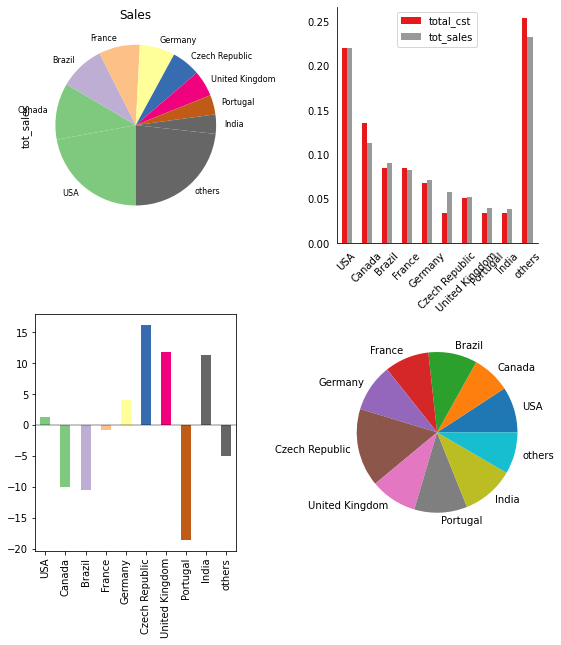

In [26]:
fig, ax = plt.subplots(nrows = 2,ncols = 2, figsize = (9,10))
ax1,ax2, ax3, ax4 = ax.flatten()
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)

# top left
sales = country["tot_sales"]
sales.plot.pie(ax = ax1, colormap = plt.cm.Accent, title = "Sales", 
               fontsize = 8,
              startangle = -90, counterclock = False)
plt.ylabel("")


# top right

cols = ["total_cst","tot_sales"]

c_s = country[cols].copy()

for c in cols:
    c_s[c] = c_s[c]/sum(c_s[c])
c_s.plot.bar(ax = ax2, rot = 45, colormap = plt.cm.Set1)
ax2.legend(loc= "upper center")
ax2.tick_params(left = False, bottom = False)
for i in ["top", "right"]:
    ax2.spines[i].set_visible(False)

# bottom left
avg_ord = country["avg_order"].copy()

avg_ord = (avg_ord*100/avg_ord.mean())-100

avg_ord.plot.bar(ax = ax3, color = colors)
ax3.axhline(0, alpha = 0.3, color = "k")


#bottom right. 

life_time_value = country["life_time_value"]

life_time_value.plot.pie(ax = ax4)
plt.ylabel("")
plt.show()

